### PySpark Machine Learning
We will build and train multiple machine learning models using pyspark to test, which is the best. We will use the following models:
- Logistic Regression
- LinearSVC
- Naive Bayes
- GBTClassifier
- RandomForestClassifier
- FMClassifier
- OneVsRest

In [1]:
import pandas as pd
from pyspark.sql import SparkSession
from Project_3.modules.sentiment_analysis import SentimentAnalysis

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
spark = SparkSession.builder \
		.appName("SentimentAnalysis") \
		.config("spark.driver.memory", "32g") \
		.config("spark.executor.memory", "32g") \
		.getOrCreate()
sentiment_analysis = SentimentAnalysis(spark)

bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
24/06/09 02:59:27 WARN Utils: Your hostname, TRONGAN-PC resolves to a loopback address: 127.0.1.1; using 172.30.116.6 instead (on interface eth0)
24/06/09 02:59:27 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/09 02:59:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = pd.read_csv("data/ready_data.csv")
df = df[df['Comment'].notna()]
df

,ID,User,ReviewTime,Rating,Comment,IDRestaurant,Restaurant,Address,OpeningTime,District,ReviewCount,ClosingTime,MaxPrice,MinPrice
0,1,PHAN LE,2023-12-20 21:13:00,5.2,gà chiên còn sống tanh khủng_khiếp,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
1,2,Thúy,2023-09-25 15:43:00,5.0,đã ăn_quả rồi ăn_ok ạ,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
2,3,Quyên Quyên,2023-06-24 11:11:00,5.0,đã thử ngon,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
3,4,Phương Thảo,2022-12-22 14:58:00,1.0,tệ mua mang về cho 1 gói tương_ớt xin thêm khô...,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
4,5,Quỳnh Nguyễn,2022-09-23 22:40:00,4.2,21 h302 đứa nhỏ kêu đói sau 1 hồi bình_loạn ch...,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28649,29955,Trannuhamy,2020-10-26 12:16:00,7.0,đặt bún_thái này trong chương_trình của coca t...,1595,Tiên Tiên - Bún Thái Cay - Tân Chánh Hiệp 16,"52/4A Tân Chánh Hiệp 16, P. Tân Chánh Hiệp (Đầ...",06:00,Quận 12,1,23:30,200000.0,25000.0
28650,29956,Phương,2021-06-01 15:34:00,10.0,bánh ngon nóng giao hàng nhanh giá phải_chăng ...,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",09:00,Quận 12,3,23:59,120000.0,12000.0
28651,29957,Tú,2021-01-31 14:29:00,3.4,phục_vụ tệ pizza_xúc xích gấp đôi phô mái khôn...,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",09:00,Quận 12,3,23:59,120000.0,12000.0
28652,29958,Hoàng Hậu Mai,2020-10-27 18:06:00,7.6,đang thèm gà rán thì lướt trúng ngày kết_hợp g...,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",09:00,Quận 12,3,23:59,120000.0,12000.0


In [4]:
try:
	reports = sentiment_analysis.train_pyspark_ml(df)
except Exception as e:
	reports = None
	print(e)
	print("Closing Spark session...")
	spark.stop()

24/06/09 02:59:40 WARN TaskSetManager: Stage 9 contains a task of very large size (1235 KiB). The maximum recommended task size is 1000 KiB.
24/06/09 02:59:42 WARN DAGScheduler: Broadcasting large task binary with size 1663.6 KiB
24/06/09 02:59:42 WARN DAGScheduler: Broadcasting large task binary with size 1658.4 KiB


+--------------------+-----+--------------------+--------------------+--------------------+
|             Comment|label|               words|            c_vector|            features|
+--------------------+-----+--------------------+--------------------+--------------------+
|gà chiên còn sống...|  1.0|[gà, chiên, còn, ...|(57948,[22,26,115...|(57948,[22,26,115...|
|đã ăn_quả rồi ăn_...|  1.0|[đã, ăn_quả, rồi,...|(57948,[29,52,364...|(57948,[29,52,364...|
|         đã thử ngon|  1.0|     [đã, thử, ngon]|(57948,[5,52,68],...|(57948,[5,52,68],...|
|tệ mua mang về ch...|  0.0|[tệ, mua, mang, v...|(57948,[1,2,3,7,8...|(57948,[1,2,3,7,8...|
|21 h302 đứa nhỏ k...|  0.0|[21, h302, đứa, n...|(57948,[0,1,2,7,1...|(57948,[0,1,2,7,1...|
|này khuyến_mại mu...|  1.0|[này, khuyến_mại,...|(57948,[3,7,13,19...|(57948,[3,7,13,19...|
|thể lâu lắm rồi t...|  0.0|[thể, lâu, lắm, r...|(57948,[1,2,3,6,7...|(57948,[1,2,3,6,7...|
|đây lần đầu bạn 4...|  2.0|[đây, lần, đầu, b...|(57948,[0,1,2,3,6...|(57948,[0,

  0%|          | 0/4 [00:00<?, ?it/s]

Loading model: logistic_regression


24/06/09 02:59:44 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 02:59:45 WARN DAGScheduler: Broadcasting large task binary with size 1671.8 KiB
24/06/09 02:59:46 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 02:59:48 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 02:59:48 WARN DAGScheduler: Broadcasting large task binary with size 1668.5 KiB
24/06/09 02:59:51 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 02:59:51 WARN DAGScheduler: Broadcasting large task binary with size 1674.5 KiB
24/06/09 02:59:52 WARN DAGScheduler: Broadcasting large task binary with size 1409.8 KiB
 25%|██▌       | 1/4 [00:11<00:35, 11.79s/it]                                   

Loading model: naive_bayes


24/06/09 02:59:55 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 02:59:56 WARN DAGScheduler: Broadcasting large task binary with size 1671.8 KiB
24/06/09 02:59:56 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 02:59:57 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 02:59:57 WARN DAGScheduler: Broadcasting large task binary with size 1668.5 KiB
24/06/09 03:00:00 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:01 WARN DAGScheduler: Broadcasting large task binary with size 1674.5 KiB
24/06/09 03:00:01 WARN DAGScheduler: Broadcasting large task binary with size 1405.6 KiB
 50%|█████     | 2/4 [00:20<00:20, 10.15s/it]                                   

Loading model: random_forest


24/06/09 03:00:06 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:06 WARN DAGScheduler: Broadcasting large task binary with size 1671.8 KiB
24/06/09 03:00:07 WARN DAGScheduler: Broadcasting large task binary with size 6.7 MiB
24/06/09 03:00:10 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:10 WARN DAGScheduler: Broadcasting large task binary with size 1668.5 KiB
24/06/09 03:00:13 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:13 WARN DAGScheduler: Broadcasting large task binary with size 1674.5 KiB
24/06/09 03:00:14 WARN DAGScheduler: Broadcasting large task binary with size 5.1 MiB
 75%|███████▌  | 3/4 [00:36<00:12, 12.53s/it]                                   

Loading model: decision_tree


24/06/09 03:00:19 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:20 WARN DAGScheduler: Broadcasting large task binary with size 1671.8 KiB
24/06/09 03:00:21 WARN DAGScheduler: Broadcasting large task binary with size 1761.3 KiB
24/06/09 03:00:21 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:22 WARN DAGScheduler: Broadcasting large task binary with size 1668.5 KiB
24/06/09 03:00:24 WARN DAGScheduler: Broadcasting large task binary with size 1664.2 KiB
24/06/09 03:00:25 WARN DAGScheduler: Broadcasting large task binary with size 1674.5 KiB
100%|██████████| 4/4 [00:45<00:00, 11.26s/it]                                   


In [5]:
reports

,model,accuracy,precision,recall,f1_score,confusion_matrix
0,logistic_regression,0.494670,0.385647,0.374484,0.379044,"[[199, 398, 350], [483, 1053, 891], [514, 1002..."
1,naive_bayes,0.515646,0.373070,0.383597,0.377186,"[[111, 443, 393], [288, 1145, 994], [317, 1150..."
2,random_forest,0.550550,0.348955,0.416437,0.379710,"[[0, 486, 461], [2, 1213, 1212], [3, 1230, 1209]]"
3,decision_tree,0.618466,0.384793,0.383081,0.382538,"[[178, 347, 422], [402, 889, 1136], [413, 868,..."


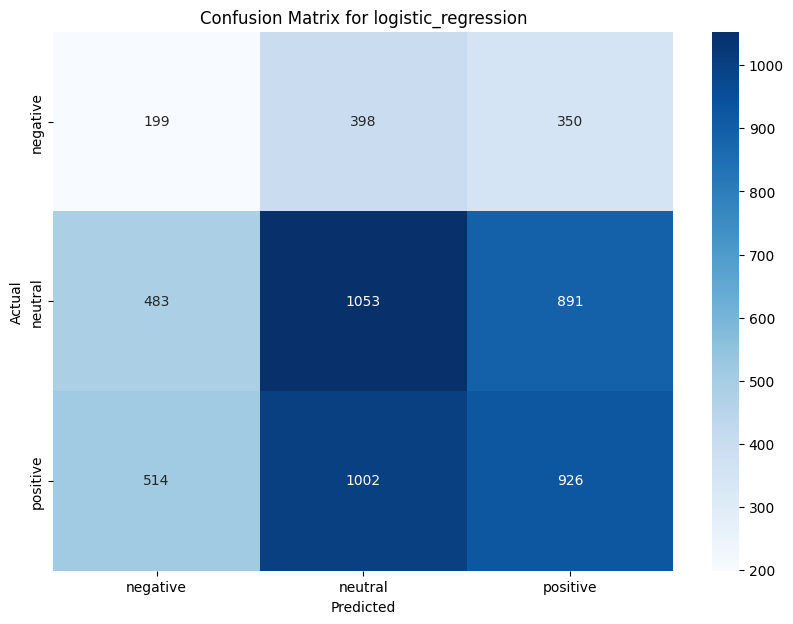

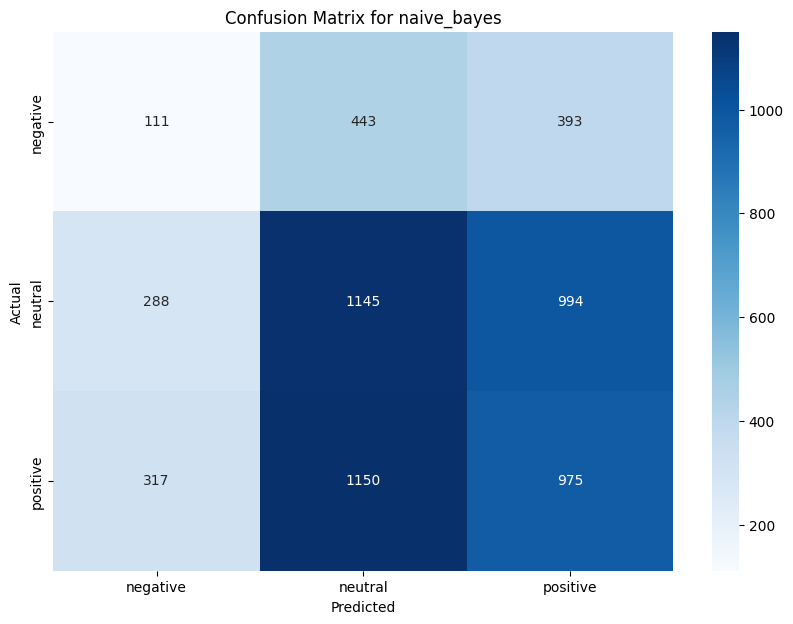

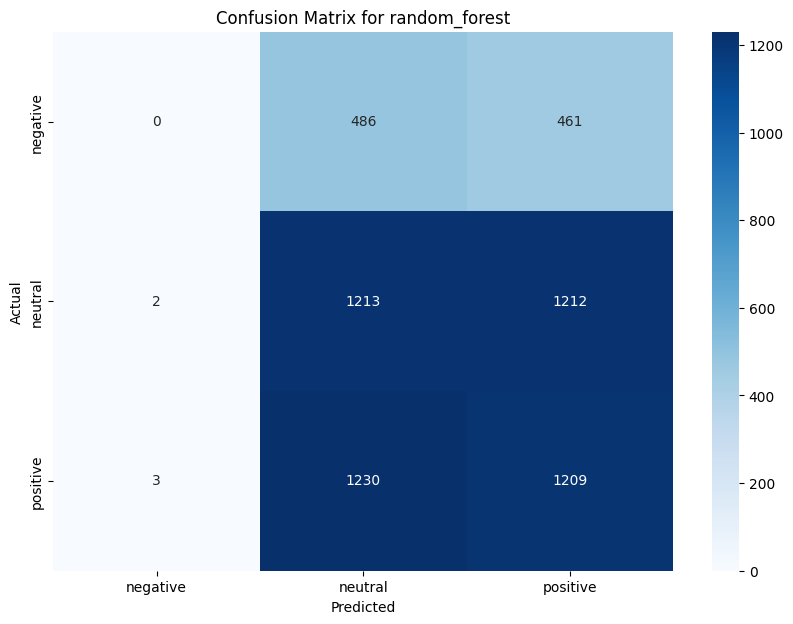

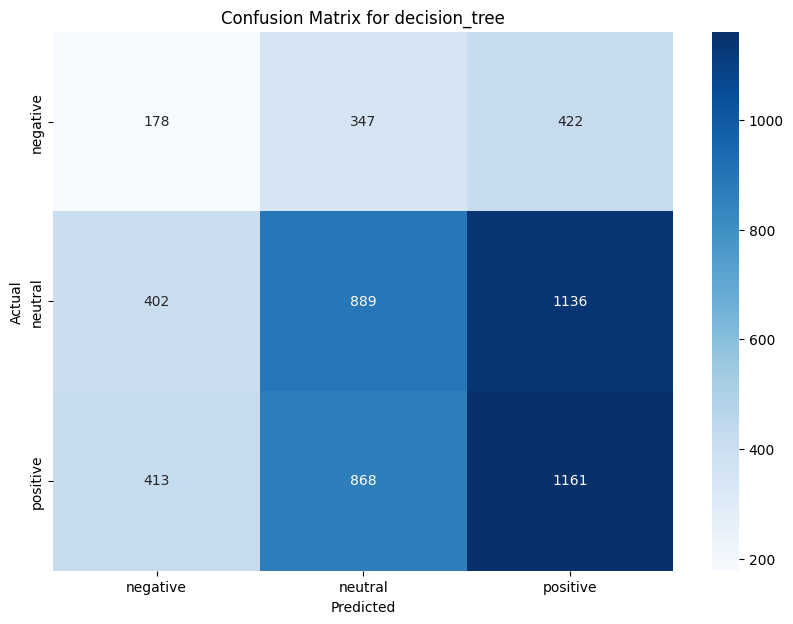

In [6]:
models = reports['model'].unique().tolist()

for model in models:
	cm = reports[reports['model'] == model]['confusion_matrix'].values[0].tolist()
	sentiment_analysis.plot_confusion_matrix(cm, model)

In [7]:
test = sentiment_analysis.predict_pyspark_ml(["đồ ăn chỗ này rất ngon"])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4429.04it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4120.14it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 6678.83it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 6626.07it/s]


Correcting wrong words in the 'Comment' column...


  0%|          | 0/1 [00:00<?, ?it/s]/mnt/e/Work/Coding/CSC/10_do_an_tot_nghiep/LDS0_K294_Online_VuTrongAn/Project_3/modules/VietnameseOcrCorrection/tool/predictor.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.LongTensor(src_text).to(self.device)
100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 10.29it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5216.80it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4702.13it/s]


Vietnamese text column handled successfully.
['đồ_ăn chỗ này ngon']


24/06/09 03:00:31 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 03:00:32 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 03:00:35 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
24/06/09 03:00:36 WARN DAGScheduler: Broadcasting large task binary with size 1731.8 KiB
100%|██████████| 4/4 [00:00<00:00, 88301.14it/s]


,model,prediction
0,logistic_regression,neutral
1,naive_bayes,positive
2,random_forest,positive
3,decision_tree,positive


In [8]:
test = sentiment_analysis.predict_pyspark_ml(["quán này dở ẹt chả có gì hấp dẫn"])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4599.02it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3945.72it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5165.40it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5940.94it/s]


Correcting wrong words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00,  8.90it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 1325.21it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7133.17it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4660.34it/s]


Vietnamese text column handled successfully.
['này dở_ết chả gì hấp_dẫn']


24/06/09 03:00:39 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 03:00:40 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 03:00:43 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
24/06/09 03:00:44 WARN DAGScheduler: Broadcasting large task binary with size 1731.8 KiB
100%|██████████| 4/4 [00:00<00:00, 59493.67it/s]


,model,prediction
0,logistic_regression,neutral
1,naive_bayes,negative
2,random_forest,positive
3,decision_tree,positive


In [11]:
test = sentiment_analysis.predict_pyspark_ml(["quán này rất tệ, bảo vệ thu tiền 500k/một xe đạp, không bảo vệ thì bị đánh, chủ quán tự nhận xét quán mình trên trời nhưng rồi vừa tiếp khách vừa chửi khách, xong vào bếp nấu luôn. Vào đây ăn mà cảm giác như vào địa ngục"])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 2991.66it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 1936.43it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 6452.78it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5419.00it/s]


Correcting wrong words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00,  5.93it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 339.37it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3041.55it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3751.61it/s]

Vietnamese text column handled successfully.
['này tệ bảo_vệ thu tiền 500 k một xe_đạp không bảo_vệ thì bị đánh_chủ tự nhận_xét mình trên trời nhưng rồi vừa tiếp khách vừa chửi khách xong vào bếp nấu luôn vào đây ăn cảm_giác như vào địa_ngục']



24/06/09 03:02:32 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 03:02:33 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
24/06/09 03:02:36 WARN DAGScheduler: Broadcasting large task binary with size 6.6 MiB
24/06/09 03:02:37 WARN DAGScheduler: Broadcasting large task binary with size 1731.8 KiB
100%|██████████| 4/4 [00:00<00:00, 73908.44it/s]


,model,prediction
0,logistic_regression,negative
1,naive_bayes,negative
2,random_forest,neutral
3,decision_tree,negative


In [9]:
# spark.stop()